# **Business Problem : Credit Loan using Data Science Approach**

*[Final Project as Data Scientist at ID/x Partners with Rakamin Academy]*

*By Muhammad Andrianto Abdillah*

*June 2022*

---

## Content

 1. Business Understanding
    * Objective
    * Description
 2. Data Understanding
    * Import Libraries
    * Load Data
    * Statistical Summaries and Visualisation
 3. Data Preparation
    * Missing values imputation
    * Feature Engineering
 4. Modelling
    * Build the Model
 5. Evaluation
    * Model Performance
    * Feature Importance
    * Who gets the best performing model
 6. Deployment
    * Submit result
    
[*Adopted from Cross Industry Standard Process for Data Mining (CRISP-DM)*](http://www.sv-europe.com/crisp-dm-methodology/)

![CripsDM](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/220px-CRISP-DM_Process_Diagram.png "Process diagram showing the relationship between the different phases of CRISP-DM")

# 1. Business Understanding

## 1.1 Objective
Predict Credit Risk based on Loan

## 1.2 Description
Credit loan problem is the one problem that often happens at Bank. Bank clients whose want to load some fund need fulfill some requirements. these Requirement is to protect money security and maintain the credibility of the bank. of course, in this case the bank has the right to determine which customers can be borrowed or determine some conditions under which the customer will not return his credit.

as many of cotumers that want to loan, Bank company need powerful insight and method to determine credit loan risk which may can be happen.

in this challenge, i will try to predict it using some mchine learning and statistcal method

# 2. Data Understanding

## 2.1 Import Libraries
for the first preparation, we need to import python libraries containing the necessary functionality we will need



In [1]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# To handle data and some matices
import pandas as pd
import numpy as np

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Modelling Help
from sklearn.preprocessing import Normalizer, scale
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn import impute

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab

# Configure visualization
%matplotlib inline


## 2.2 Load Data

In [2]:
# load credit load data in csv file 
df = pd.read_csv('loan_data_2007_2014.csv')

In [3]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.2.1 Key Information about variables


In [4]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


## 2.2.2 Heat map Correlation

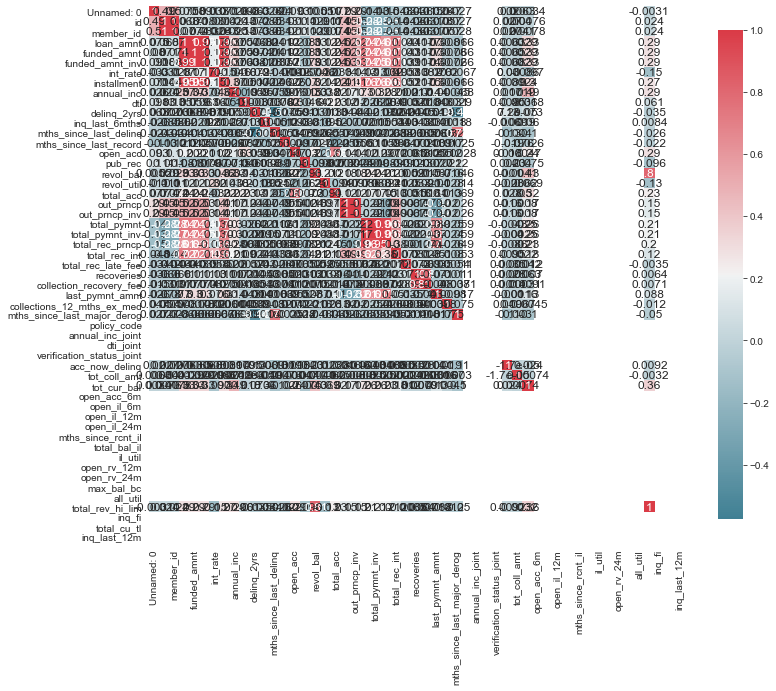

In [5]:
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
    
plot_correlation_map(df)

## 2.2.3 Relationship between Loan status and loan amount

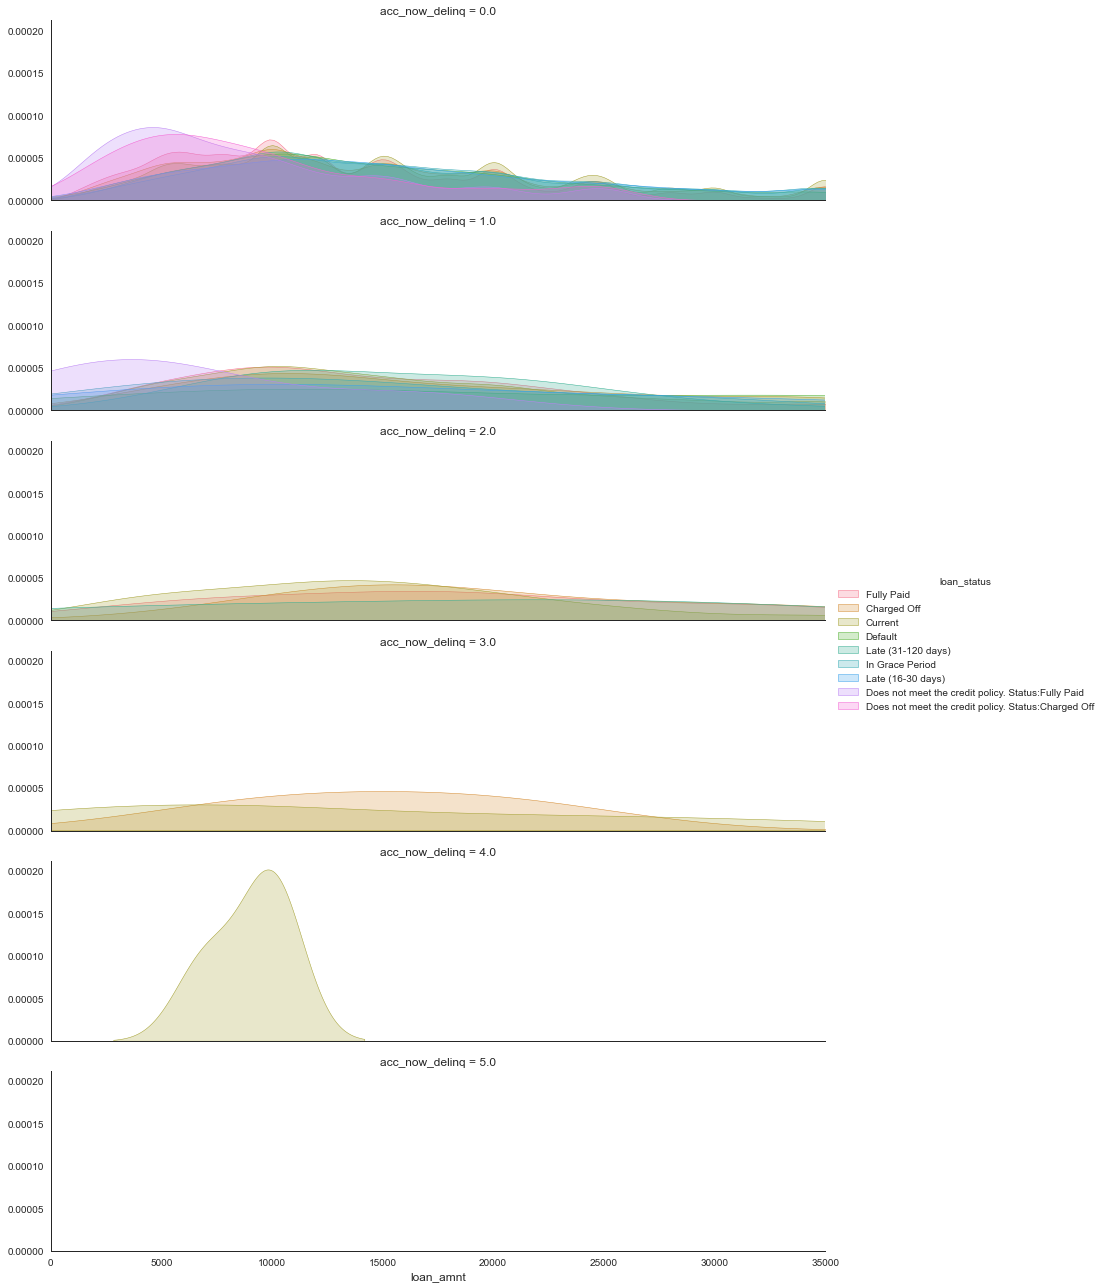

In [6]:
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()
    
# Plot distributions of Loan amount and loan status
plot_distribution(df, var='loan_amnt', target='loan_status', row = 'acc_now_delinq')

## 2.2.5 Categorical plot

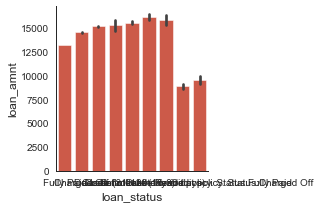

In [7]:
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

    # Plot loan amount by loan status
plot_categories( df , cat = 'loan_status' , target = 'loan_amnt' )

# 3. DataPreparation

## 3.1 Drop Coloumn
There are coloumns which have not values or full of nan value. these columns need to be drop

In [8]:
df.drop(['inq_last_12m', 'total_cu_tl', 'inq_fi', 'total_rev_hi_lim', 'all_util', 'max_bal_bc'], inplace=True, axis=1 )

In [9]:
df.shape

(466285, 69)

In [10]:
df.drop(['open_rv_24m', 'open_rv_12m', 'il_util', 'total_bal_il', 'mths_since_rcnt_il'], inplace=True, axis=1 )

In [11]:
df.shape

(466285, 64)

In [12]:
df.drop(df.iloc[:, -6:-1], inplace=True, axis=1 )

In [13]:
df.drop(['open_il_24m'], inplace=True, axis=1)

In [14]:
df.shape

(466285, 58)

In [15]:
df.drop(['verification_status_joint', 'dti_joint', 'annual_inc_joint', 'mths_since_last_major_derog', 'next_pymnt_d'], inplace=True, axis=1)

In [16]:
df.shape

(466285, 53)

In [17]:
df.drop(['id','member_id', 'emp_title', 'url', 'desc', 'purpose', 'title', 'zip_code'], inplace=True, axis=1)

In [18]:
df.shape

(466285, 45)

## 3.2 Control Missing Values

In [19]:
df= df.fillna(0)

In [20]:
df.isnull().sum()

Unnamed: 0                    0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
mths_since_last_record        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_py

## 3.3 Label encoding the Categorical variables

In [21]:
df.dtypes

Unnamed: 0                      int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
mths_since_last_delinq        float64
mths_since_last_record        float64
open_acc                      float64
pub_rec                       float64
revol_bal                       int64
revol_util  

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['application_type'] = label_encoder.fit_transform(df['application_type'])

#change type of datas


In [23]:
df['application_type'].dtypes

dtype('int32')

In [24]:
df.drop(['last_credit_pull_d','last_pymnt_d', 'earliest_cr_line', 'issue_d'], inplace=True, axis=1)

In [25]:
df.dtypes

Unnamed: 0                      int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
loan_status                    object
pymnt_plan                     object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
mths_since_last_delinq        float64
mths_since_last_record        float64
open_acc                      float64
pub_rec                       float64
revol_bal                       int64
revol_util                    float64
total_acc                     float64
initial_list

In [26]:
df['initial_list_status'] = label_encoder.fit_transform(df['initial_list_status'])

In [27]:
df['addr_state'] = label_encoder.fit_transform(df['addr_state'])

In [28]:
df['pymnt_plan'] = label_encoder.fit_transform(df['pymnt_plan'])

In [29]:
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])

In [30]:
df['verification_status'] = label_encoder.fit_transform(df['verification_status'])

In [31]:
df['home_ownership'] = label_encoder.fit_transform(df['home_ownership'])

In [32]:
df['sub_grade'] = label_encoder.fit_transform(df['sub_grade'])

In [33]:
df['grade'] = label_encoder.fit_transform(df['grade'])

In [34]:
df['term'] = label_encoder.fit_transform(df['term'])

In [35]:
df.drop(['emp_length'], inplace=True, axis=1)

In [36]:
df.dtypes

Unnamed: 0                      int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                            int32
int_rate                      float64
installment                   float64
grade                           int32
sub_grade                       int32
home_ownership                  int32
annual_inc                    float64
verification_status             int32
loan_status                     int32
pymnt_plan                      int32
addr_state                      int32
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
mths_since_last_delinq        float64
mths_since_last_record        float64
open_acc                      float64
pub_rec                       float64
revol_bal                       int64
revol_util                    float64
total_acc                     float64
initial_list_status             int32
out_prncp   

In [37]:
df.shape

(466285, 40)

## 3.4 Create Dataset
Define Training and Test data set

In [38]:
X = df.loc[:, df.columns != 'loan_status']

In [39]:
y = df.loc[:,'loan_status']

In [40]:
train_X, test_X, train_y, test_y = train_test_split(X,y, train_size=0.7)

In [41]:
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(326399, 39) (139886, 39) (326399,) (139886,)


### 3.4.1 Feature Importance
evaluate the most important variables are the model to make the prediction

1.0


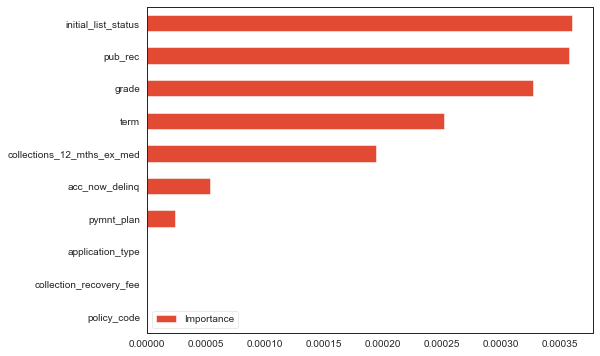

In [42]:
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )

plot_variable_importance(train_X, train_y)

initial status variabel is the most importance variables

# 4. Modeling

## 4.1 Model Selection
there are several option to chooose from when it comes to models.

### 4.1.1 Logistic Regression
Try a Logistic Regression model

In [43]:
model = LogisticRegression()

### 4.1.2 Support Vector Machine (SVM)

In [44]:
model = SVC()

### 4.1.3 KNN

In [45]:
model = KNeighborsClassifier(n_neighbors = 3)

## 4.2 Train the selected model
select one model instead then try to train model

In [46]:
model.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=3)

# 5. Evaluation
we are going to evaluate model performance and the feature importance

## 5.1 Model performance
evaluate the accuracy

In [47]:
print('Model score : ',model.score(train_X, train_y)*100, ' %')

Model score :  94.86242298536453  %


In [49]:
#model.evaluate(test_X, test_y)

In [50]:
model.predict(test_X)

array([1, 1, 5, ..., 1, 1, 0])

# 6.Deployment
Submit this project to Rakamin Website
Thanks for the Intern Project, this make me realize that i have to practice more so that i can to be an expert and able to reach my dream job